# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob
import librosa

#Bibliotecas de configuracion de colores
from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Leemos el audio

Nos limitamos a leer solo un segundo del audio

In [2]:
audio_files = glob('dataset/*.wav')
y, sr = librosa.load(audio_files[0], sr=None)
y = y[:sr]

# Mostramos el audio

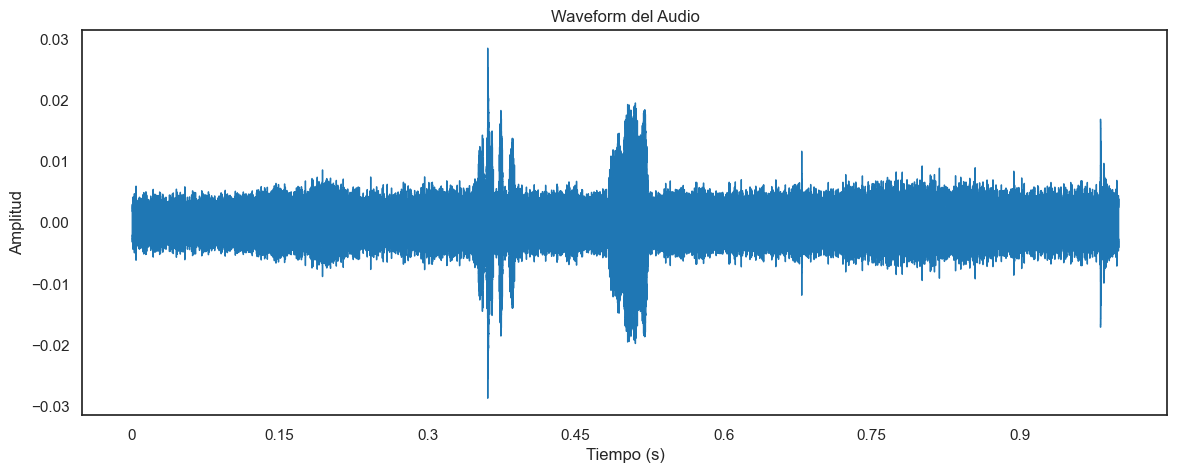

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform del Audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Calculamos la Transformada rapida de Fourier

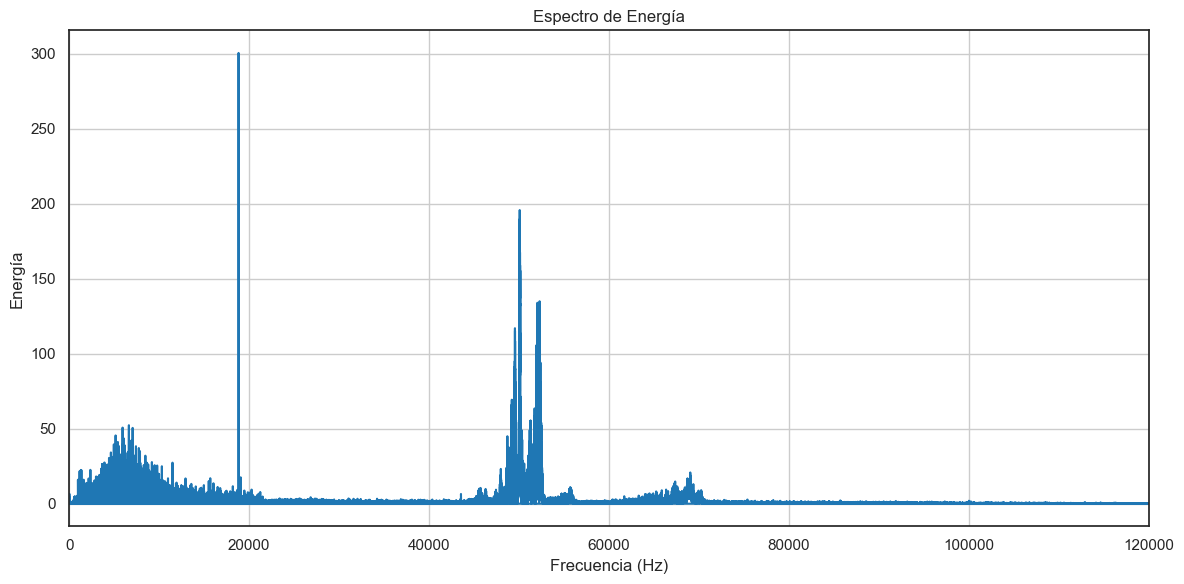

In [4]:
y = y - np.mean(y) #Eliminamos el desplazamiento y centramos en cero las muestras de la señal
N = len(y)
fhat = np.fft.fft(y)  # Calculamos la FFT
PSD = np.abs(fhat)**2  # Calculamos la energía solo de la mitad positiva
 # Generamos el arreglo de frecuencias correspondiente (igual; la mitad) || freq = np.linspace(0, sr/2, N//2 + 1) 
freq = np.fft.fftfreq(N, d=1/sr)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(freq[:N//2 + 1], PSD[:N//2 + 1])
plt.xlim(0, 120000)
plt.title('Espectro de Energía')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Energía')
plt.grid(True)
plt.tight_layout()
plt.show()

# Buscamos cual es la frecuencia con más energia

Aqui simplemente vemos cual de las frecuencias termina siendo más relevante en cuanto a nivel de energia para la señal original.

In [5]:
# Encontrar el índice de la energía máxima
idx_max = np.argmax(PSD)

# Obtener la frecuencia correspondiente
freq_max = freq[idx_max]

# Y también la energía máxima si quieres
energia_max = PSD[idx_max]

print(f"La frecuencia con más energía es {freq_max:.2f} Hz con una energía de {energia_max:.2f}")

La frecuencia con más energía es 18826.00 Hz con una energía de 300.37


# Eliminamos las frecuencias que no nos interesan para el analisis de las USVs

In [6]:
fhat_filtrada = fhat.copy()
fhat_filtrada[np.abs(freq) < 20000] = 0

# Graficamos para corroborar que se eliminaron las frecuencias no deseadas

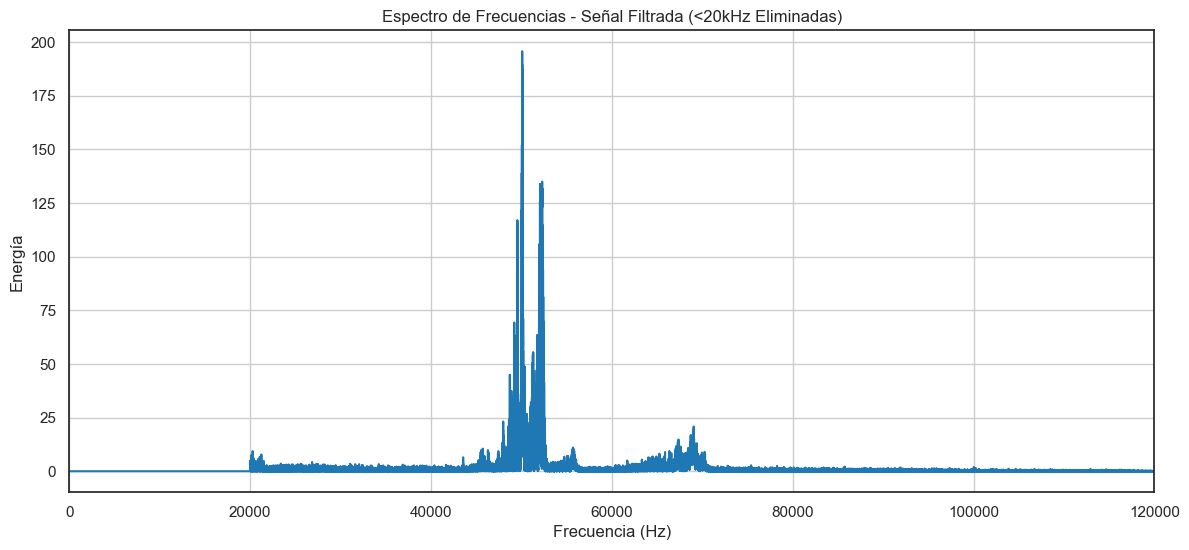

In [7]:
N_filtrada = len(fhat_filtrada)

# Obtener energía espectral (magnitud al cuadrado)
energia_espectral = np.abs(fhat_filtrada[:N_filtrada//2 + 1])**2
frequencies = np.linspace(0, sr/2, N_filtrada//2 + 1)

plt.figure(figsize=(14, 6))
plt.plot(frequencies, energia_espectral)
plt.xlim(0, 120000)  # Puedes ajustar si quieres más o menos rango
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Energía')
plt.title('Espectro de Frecuencias - Señal Filtrada (<20kHz Eliminadas)')
plt.grid(True)
plt.show()

# Comparación grafica Original vs Filtrada

Mostramos una comparación que nos permita ver que se ha realizado la limpieza correctamente.

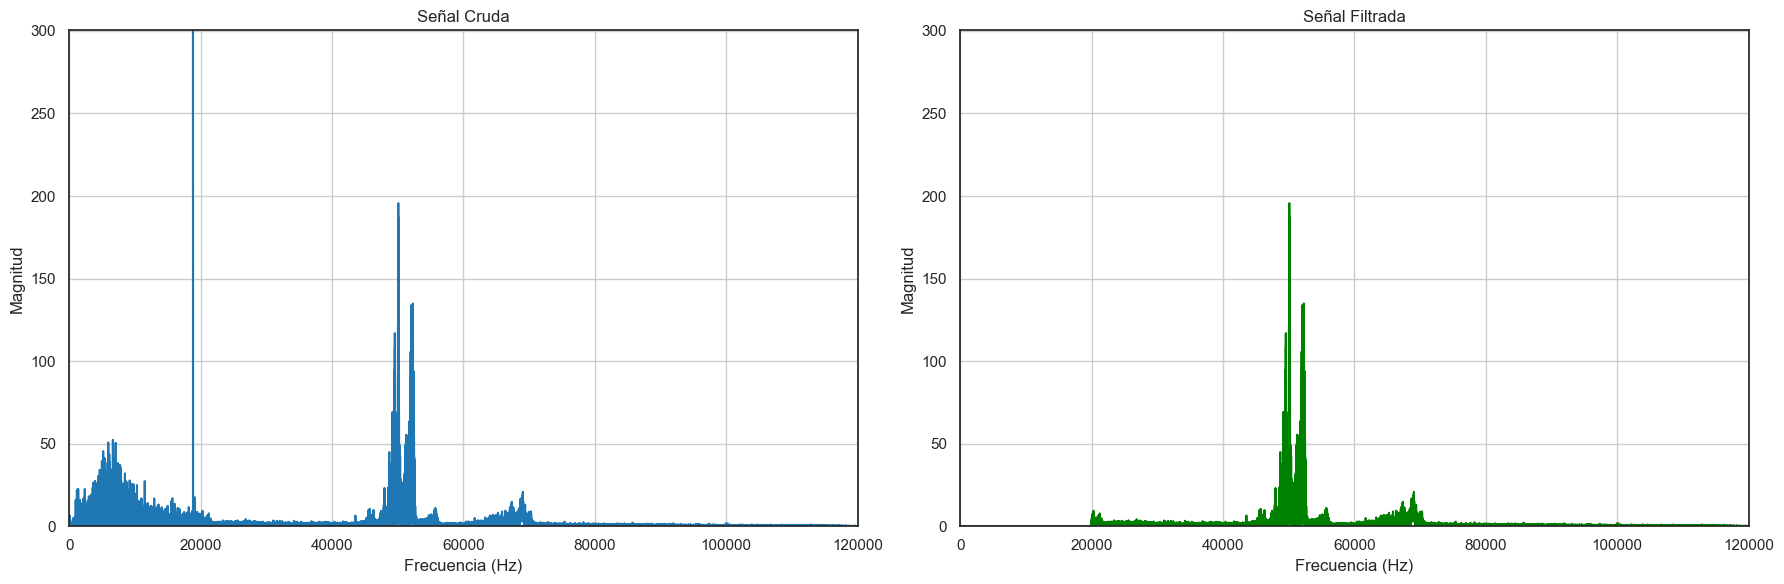

In [8]:
max_y = max(max(PSD), max(energia_espectral))

plt.figure(figsize=(18, 6))

# Señal cruda
plt.subplot(1, 2, 1)
plt.plot(freq, PSD)
plt.xlim(0, 120000)
plt.ylim(0, max_y)  # Usar la misma escala Y
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Señal Cruda')
plt.grid(True)

# Señal filtrada
plt.subplot(1, 2, 2)
plt.plot(frequencies, energia_espectral, color='green')
plt.xlim(0, 120000)
plt.ylim(0, max_y)  # Misma escala Y
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Señal Filtrada')
plt.grid(True)

# Mostrar todo junto
plt.tight_layout()
plt.show()

# Corroboramos IFFT

Simplemente buscamos que el elemento complejo más grande sea súper despreciable

In [9]:
y_limpio = np.fft.ifft(fhat_filtrada)
print(np.max(np.abs(y_limpio.imag)))

1.2848584e-09


# Reconstruimos la señal filtrada y la comparamos con la señal original

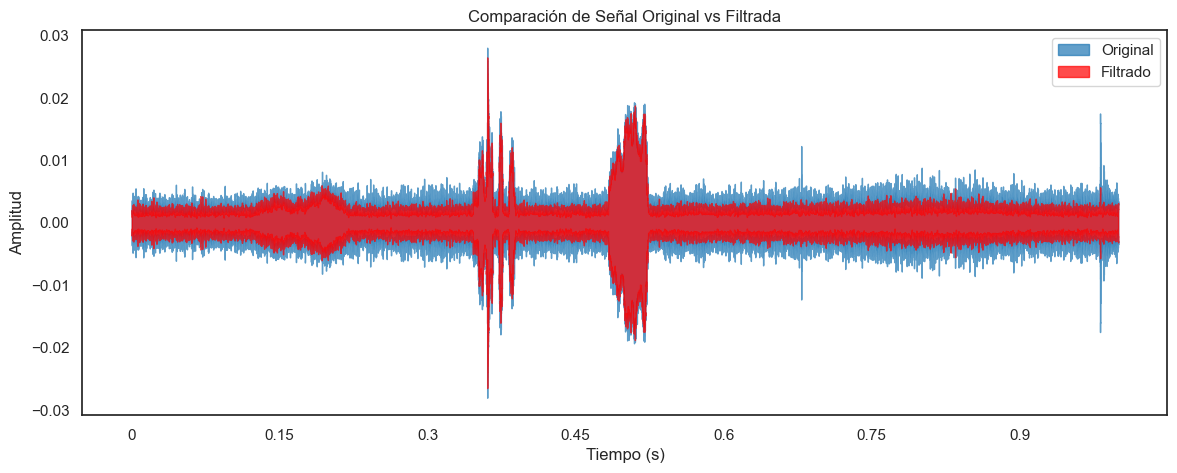

In [10]:
# Asegúrate de trabajar solo con la parte real
y_limpio_real = y_limpio.real

# Crear eje de tiempo
t = np.arange(len(y_limpio_real)) / sr

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.7, label='Original')
librosa.display.waveshow(y_limpio.real, sr=sr, color='r', alpha=0.7, label='Filtrado')
plt.title('Comparación de Señal Original vs Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()